# Scientific Computing 6.1: Error estimation
To illustrate how errors of measured statistics can be estimated, how the sample size influences the standard error and how the standard error can be calculated using bootstrapping, this program works with values drawn from a lognormal distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm
from scipy.stats import bootstrap

### Error estimation of sampled lognormal distribution
A dataset of $n = 1000$ values is drawn from a lognormal distribution with $\mu = 1$ and $\sigma = 0.5$. From these values, the following statistics are estimated:

- arithmetic mean
- median
- standard deviation
- variance
- coefficient of variation

The standard error of each estimate is calculated using bootstrapping with $B = 10000$ repetitions.

In [2]:
# Values to generate lognormal distribution:
mu, sigma = 1, 0.5
n = 1000

# Generate lognormal distribution with specified seed for reproducability:
rng = np.random.default_rng(421)
x = rng.lognormal(mu, sigma, n)

# Calculate statistics of the distribution:
a = np.mean(x)
b = np.median(x)
c = np.std(x)
d = np.var(x)
e = c/a

# Calculate standard errors of the statistic using bootstrapping:
B = 10000
a_SE = np.std(bootstrap((x,), np.mean, n_resamples=B).bootstrap_distribution)
b_SE = np.std(bootstrap((x,), np.median, n_resamples=B).bootstrap_distribution)
c_SE = np.std(bootstrap((x,), np.std, n_resamples=B).bootstrap_distribution)
d_SE = np.std(bootstrap((x,), np.var, n_resamples=B).bootstrap_distribution)
e_SE = np.std(bootstrap((x,), lambda x: np.std(x) / np.mean(x), n_resamples=B).bootstrap_distribution)

# Print the results:
print(f"a = {a:.15f} (mean)")
print(f"b = {b:.15f} (median)")
print(f"c = {c:.15f} (SD)")
print(f"d = {d:.15f} (variance)")
print(f"e = {e:.15f} (coefficient of variation)\n")
print(f"a_SE = {a_SE:.15f} (SE of the mean)")
print(f"b_SE = {b_SE:.15f} (SE of the median)")
print(f"c_SE = {c_SE:.15f} (SE of the SD)")
print(f"d_SE = {d_SE:.15f} (SE of the variance)")
print(f"e_SE = {e_SE:.15f} (SE of the coefficient of variation)")

a = 3.095256792078693 (mean)
b = 2.722760984468430 (median)
c = 1.635679731145568 (SD)
d = 2.675448182880436 (variance)
e = 0.528447182583222 (coefficient of variation)

a_SE = 0.051693871936302 (SE of the mean)
b_SE = 0.046063015786344 (SE of the median)
c_SE = 0.066718881949697 (SE of the SD)
d_SE = 0.216359470777580 (SE of the variance)
e_SE = 0.017301404980862 (SE of the coefficient of variation)


### Sample size variation
The analysis is repeated for different sample sizes $n \in \left[ 10, 10^4 \right]$.

In [3]:
# Repeat bootstrapping for different sample sizes:
n = np.logspace(1, 4, num=50, base=10, dtype=int)
x = rng.lognormal(mu, sigma, 10000)

# Initialize lists for standard error values:
a_SE = np.zeros(len(n))
b_SE = np.zeros(len(n))
c_SE = np.zeros(len(n))
d_SE = np.zeros(len(n))
e_SE = np.zeros(len(n))

for i in range(len(n)):
    a_SE[i] = np.std(bootstrap((x[:n[i]],), np.mean, n_resamples=B).bootstrap_distribution)
    b_SE[i] = np.std(bootstrap((x[:n[i]],), np.median, n_resamples=B).bootstrap_distribution)
    c_SE[i] = np.std(bootstrap((x[:n[i]],), np.std, n_resamples=B).bootstrap_distribution)
    d_SE[i] = np.std(bootstrap((x[:n[i]],), np.var, n_resamples=B).bootstrap_distribution)
    e_SE[i] = np.std(bootstrap((x[:n[i]],), lambda x: np.std(x) / np.mean(x), n_resamples=B).bootstrap_distribution)

### Plot the results
The distribution from the beginning and the standard error as a function of $n$ are plotted.

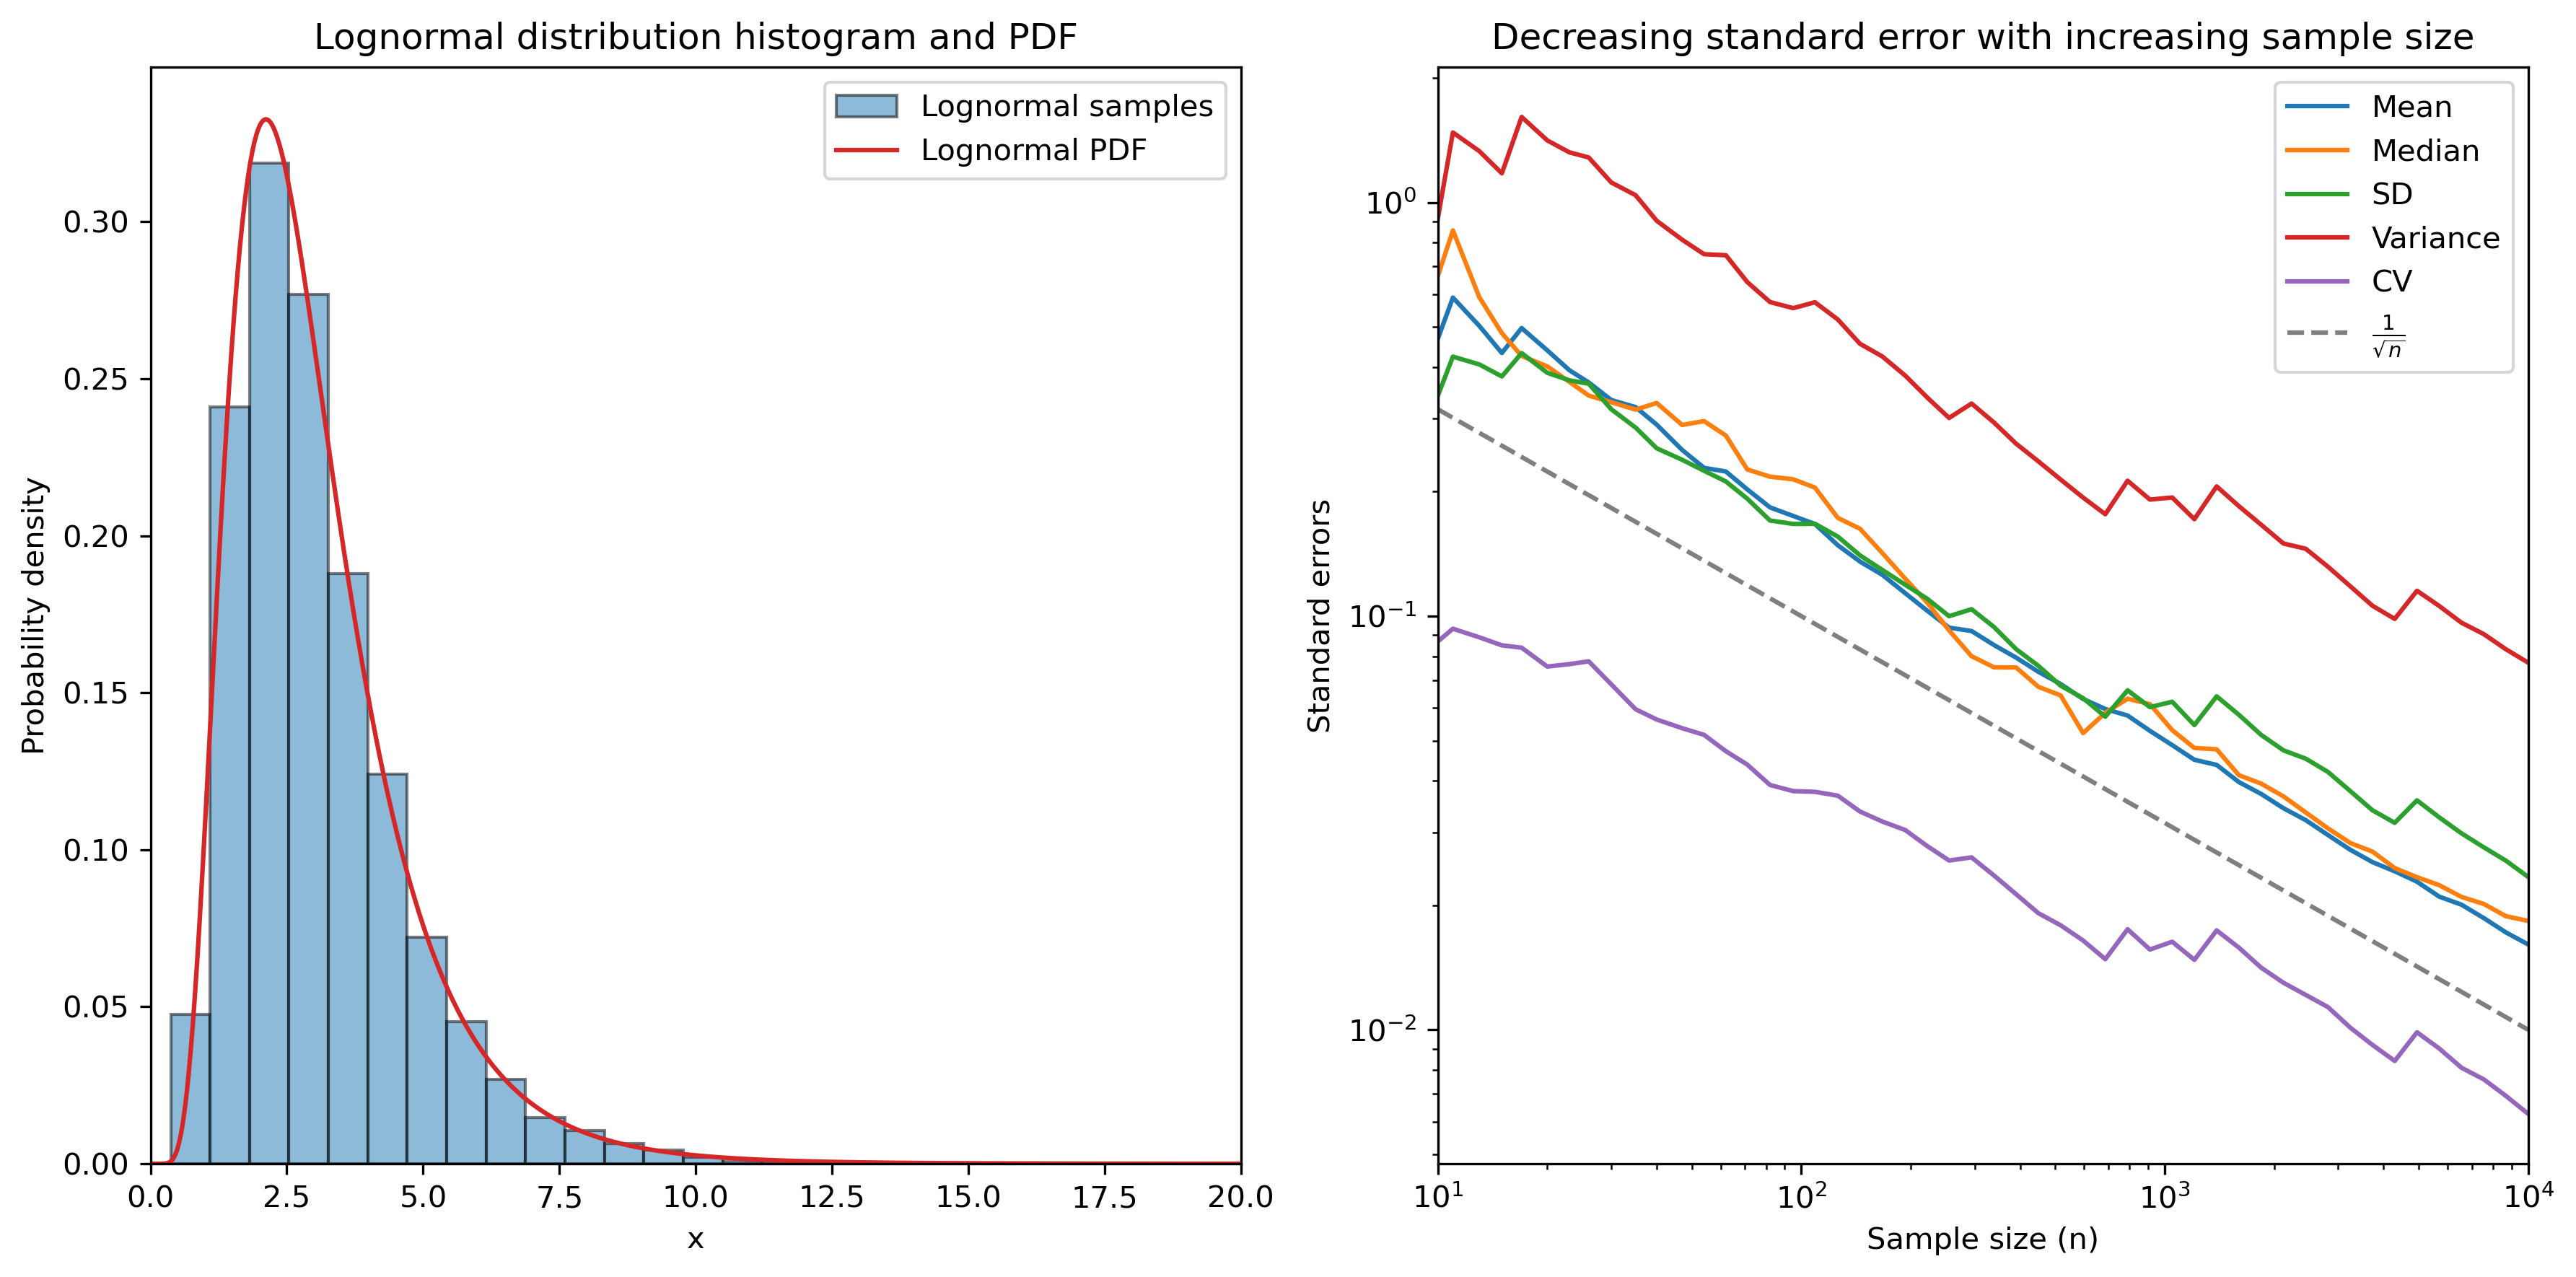

In [4]:
# Initialize plot with 2 subplots:
fig = plt.figure(figsize=(12, 6), dpi=300)

# SUBPLOT 1:
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_xlim(0, 20)
ax1.set_xlabel("x")
ax1.set_ylabel("Probability density")
ax1.set_title("Lognormal distribution histogram and PDF")
# Plot the histogram of the distribution:
ax1.hist(x, bins=30, density=True, alpha=0.5, color="C0", edgecolor="k", label="Lognormal samples")
# Evaluate and plot the probability density function (PDF):
scale = np.linspace(0, 20, 1000)
pdf_values = lognorm.pdf(scale, s=sigma, scale=np.exp(mu))
ax1.plot(scale, pdf_values, color="C3", label="Lognormal PDF")
ax1.legend()

# SUBPLOT 2:
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlim(10**1, 10**4)
ax2.set_xlabel("Sample size (n)")
ax2.set_ylabel("Standard errors")
ax2.set_title("Decreasing standard error with increasing sample size")
# Plot the standard errors:
ax2.loglog(n, a_SE, label="Mean")
ax2.loglog(n, b_SE, label="Median")
ax2.loglog(n, c_SE, label="SD")
ax2.loglog(n, d_SE, label="Variance")
ax2.loglog(n, e_SE, label="CV")
# Plot reference for theoretical decrease in the standard error:
ax2.loglog(n, 1/n**(1/2), linestyle="dashed", color="black", alpha=0.5, label=r"$\frac{1}{\sqrt{n}}$")
ax2.legend()

plt.tight_layout()
plt.show()

The asymptotic scaling $SE \sim 1 / \sqrt{n}$ of the standard error can be seen from the slopes in the plot. The gray line represents the theoretical scaling, with the other lines following that slope nicely.